# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.359  1  0.701 0.403 0.004   
                             age        0.152  1  0.297 0.586 0.002   
                             Kiel       1.995  1  3.900 0.050 0.020   
                             Magdeburg  4.253  1  8.315 0.004 0.042   
                             Sweden     6.998  1 13.682 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.180  1  0.187 0.666 0.001   
                             age        1.034  1  1.073 0.302 0.006   
                             Kiel       0.019  1  0.020 0.887 0.000   
                             Magdeburg  1.751  1  1.818 0.179 0.009   
                             Sweden    21.390  1 22.212 0.000 0.104   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.394  0.563    False  
                             age               0.232  0.721    False  
                             Kiel              1.304  0.121    False  
                             Magdeburg         2.358  0.017     True  
                             Sweden            3.548  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.177  0.783    False  
                             age               0.521  0.463    False  
                             Kiel              0.052  0.938    False  
                             Magdeburg         0.747  0.321    False  
                             Sweden            5.328  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     RF                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.929  1  6.884 0.009 0.035   
                             age       0.005  1  0.036 0.849 0.000   
                             Kiel      0.238  1  1.759 0.186 0.009   
                             Magdeburg 0.450  1  3.336 0.069 0.017   
                             Sweden    1.620  1 12.000 0.001 0.059   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        1.112  1  2.347 0.127 0.012   
                             age       0.859  1  1.814 0.180 0.009   
                             Kiel      1.906  1  4.024 0.046 0.021   
                             Magdeburg 1.332  1  2.812 0.095 0.015   
                             Sweden    9.799  1 20.689 0.000 0.098   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.027  0.027     True  
                             age               0.071  0.905    False  
                             Kiel              0.730  0.305    False  
                             Magdeburg         1.159  0.139    False  
                             Sweden            3.183  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.896  0.227    False  
                             age               0.746  0.297    False  
                             Kiel              1.335  0.100    False  
                             Magdeburg         1.021  0.180    False  
                             Sweden            5.018  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.403         0.394  0.563    False   
                             age       0.586         0.232  0.721    False   
                             Kiel      0.050         1.304  0.121    False   
                             Magdeburg 0.004         2.358  0.017     True   
                             Sweden    0.000         3.548  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.666         0.177  0.783    False   
                             age       0.302         0.521  0.463    False   
                             Kiel      0.887         0.052  0.938    False   
                             Magdeburg 0.179         0.747  0.321    False   
                             Sweden    0.000         5.328  0.000     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.027  0.027     True  
                             age       0.849         0.071  0.905    False  
                             Kiel      0.186         0.730  0.305    False  
                             Magdeburg 0.069         1.159  0.139    False  
                             Sweden    0.001         3.183  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.127         0.896  0.227    False  
                             age       0.180         0.746  0.297    False  
                             Kiel      0.046         1.335  0.100    False  
                             Magdeburg 0.095         1.021  0.180    False  
                             Sweden    0.000         5.018  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.485     0.337     0.234         3.091     0.293
std       0.303         5.346     0.331     0.297         5.838     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.339     0.015     0.001         0.383     0.003
50%       0.120         0.919     0.241     0.071         1.150     0.141
75%       0.458         2.435     0.611     0.414         3.089     0.552
max       0.999       148.755     0.999     1.000        85.298     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.403         0.394   
A0A024R0T9;K7ER74;P02655                           AD     0.066         1.183   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.012         1.925   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.447         0.350   
A0A075B6H7                                         AD     0.213         0.671   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.054         1.269   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.171         0.766   
S4R3U6                                             AD     0.666         0.177   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.563    False   
A0A024R0T9;K7ER74;P02655                           AD      0.150    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.039     True   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.602    False   
A0A075B6H7                                         AD      0.364    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.128    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.310    False   
S4R3U6                                             AD      0.783    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.027   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.487   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.435         0.361   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.259         0.587   
A0A075B6H7                                         AD     0.008         2.105   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.194         0.712   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.485         0.314   
S4R3U6                                             AD     0.127         0.896   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.027     True  
A0A024R0T9;K7ER74;P02655                           AD      0.075    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.572    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.392    False  
A0A075B6H7                                         AD      0.023     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.405     0.337     0.247         1.521     0.312
std       0.294         1.621     0.319     0.295         1.761     0.319
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.356     0.040     0.009         0.362     0.026
50%       0.121         0.918     0.241     0.101         0.997     0.188
75%       0.441         1.916     0.597     0.435         2.050     0.572
max       0.998        21.038     0.999     0.999        18.911     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1033,971


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.403         0.394  0.563   
A0A024R0T9;K7ER74;P02655                           0.066         1.183  0.150   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.012         1.925  0.039   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.447         0.350  0.602   
A0A075B6H7                                         0.213         0.671  0.364   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.054         1.269  0.128   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.171         0.766  0.310   
S4R3U6                                             0.666         0.177  0.783   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...     True 0.435   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.259   
A0A075B6H7                                            False 0.008   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.194   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.485   
S4R3U6                                                False 0.127   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.027  0.027   
A0A024R0T9;K7ER74;P02655                                   1.487  0.075   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.361  0.572   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.587  0.392   
A0A075B6H7                                                 2.105  0.023   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.292   
Q9Y6X5                                                     0.712  0.315   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.161   
Q9Y6Y9                                                     0.314  0.616   
S4R3U6                                                     0.896  0.227   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    898
PI (yes) - RF (yes)   315
PI (no)  - RF (yes)   135
PI (yes) - RF (no)     73
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.403         0.394  0.563   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.012         1.925  0.039   
A0A075B6H7                                         0.213         0.671  0.364   
A0A075B6H9                                         0.467         0.331  0.620   
A0A075B6I0                                         0.024         1.615  0.069   
...                                                  ...           ...    ...   
Q9ULP0-3;Q9ULP0-6                                  0.032         1.490  0.086   
Q9ULZ9                                             0.000         3.343  0.003   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                           0.009         2.024  0.032   
Q9UP79                                             0.331         0.480  0.494   
Q9UQ52                                             0.099         1.004  0.208   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...     True 0.435   
A0A075B6H7                                            False 0.008   
A0A075B6H9                                            False 0.019   
A0A075B6I0                                            False 0.001   
...                                                     ...   ...   
Q9ULP0-3;Q9ULP0-6                                     False 0.005   
Q9ULZ9                                                 True 0.042   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                               True 0.092   
Q9UP79                                                False 0.000   
Q9UQ52                                                False 0.001   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.027  0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.361  0.572   
A0A075B6H7                                                 2.105  0.023   
A0A075B6H9                                                 1.718  0.048   
A0A075B6I0                                                 3.095  0.003   
...                                                          ...    ...   
Q9ULP0-3;Q9ULP0-6                                          2.299  0.016   
Q9ULZ9                                                     1.372  0.093   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                                   1.034  0.176   
Q9UP79                                                     3.646  0.001   
Q9UQ52                                                     3.021  0.004   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A075B6H7                                             True        91  
A0A075B6H9                                             True       189  
A0A075B6I0                                             True       194  
...                                                     ...       ...  
Q9ULP0-3;Q9ULP0-6                                      True       136  
Q9ULZ9                                                False       171  
Q9UMX0;Q9UMX0-2;Q9UMX0-4                              False        57  
Q9UP79                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.563,0.027,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.150,0.075,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.039,0.572,174,PI (yes) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.602,0.392,196,PI (no) - RF (no)
A0A075B6H7,0.364,0.023,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.292,197,PI (no) - RF (no)
Q9Y6X5,0.128,0.315,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.161,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.000,0.994,119,PI (yes) - RF (no),0.994
F6VDH7;P50502;Q3KNR6,0.009,0.998,175,PI (yes) - RF (no),0.990
Q96PQ0,0.007,0.981,177,PI (yes) - RF (no),0.975
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.043,0.996,176,PI (yes) - RF (no),0.953
P01912;Q5Y7A7,0.994,0.042,76,PI (no) - RF (yes),0.953
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.048,197,PI (no) - RF (yes),0.008
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008
K7ERG9;P00746,0.052,0.043,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


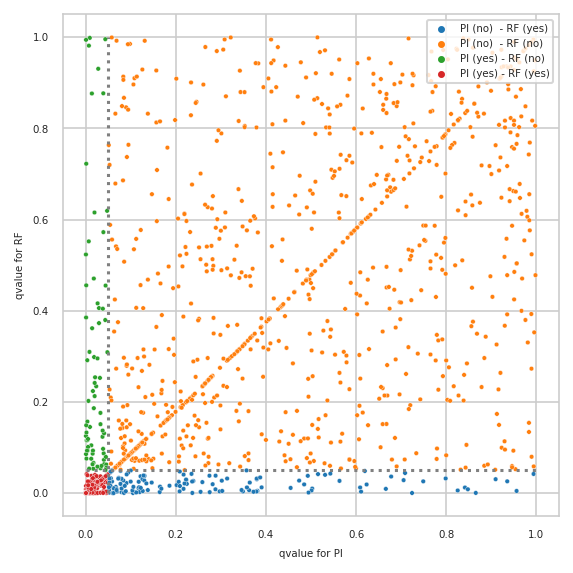

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


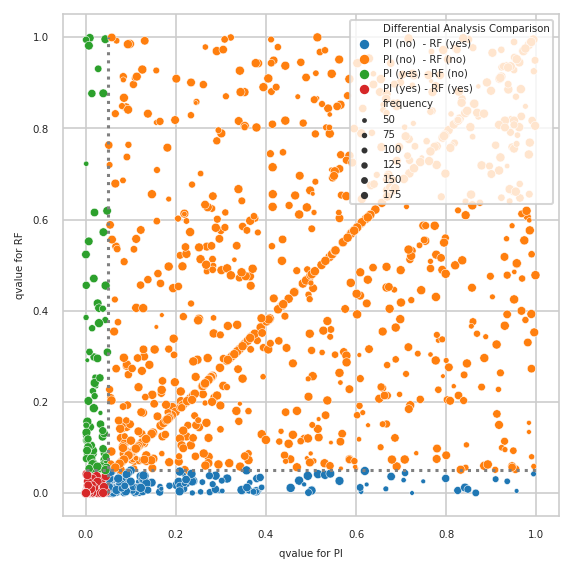

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out